# Code for Section 2.1 Risk and Return Trade-Off

In [4]:
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
import fortitudo.tech as ft
import matplotlib.pyplot as plt

# Download and preprocess data

In [5]:
tickers = [
    'XLB', 'XLE', 'XLF', 'XLI', 'XLK',
    'XLP', 'XLU', 'XLV', 'XLY', '^GSPC']
data = yf.download(tickers, start='1998-12-22', end='2024-10-12')['Close']

names_dict = {
    'XLB': 'Materials', 'XLE': 'Energy', 'XLF': 'Financial', 'XLI': 'Industrial',
    'XLK': 'Technology', 'XLP': 'Consumer Staples', 'XLU': 'Utilities',
    'XLV': 'Health Care', 'XLY': 'Consumer Discretionary', '^GSPC': 'S&P 500'}
data = data.rename(columns=names_dict)

print(f'The number of daily observations is {len(data)}.')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  10 of 10 completed

The number of daily observations is 6493.


# Compute historical statistics

In [13]:
H = 1
equity_returns = (data.values[H:] - data.values[0:-H]) / data.iloc[0:-H]
equity_returns_df = pd.DataFrame(100 * equity_returns, columns=data.columns)
equity_stats = ft.simulation_moments(equity_returns_df)

# Add 90%-CVaR
cvars = ft.portfolio_cvar(
    np.eye(len(equity_returns_df.columns)), equity_returns_df, alpha=0.9)
equity_stats['90%-CVaR'] = cvars[0, :]

# Print (Table 2.1 - 2.3)
display(equity_stats)

,Mean,Volatility,Skewness,Kurtosis,90%-CVaR
Ticker,,,,,
Materials,0.043597,1.502042,-0.019689,9.469290,2.734814
Energy,0.048124,1.820569,-0.247116,13.884898,3.264695
Financial,0.038107,1.816823,0.313334,17.525598,3.162833
Industrial,0.043473,1.338345,-0.163459,10.649342,2.477230
Technology,0.048140,1.633290,0.272815,10.138522,3.036453
Consumer Staples,0.031213,0.964162,-0.096680,10.945294,1.756345
Utilities,0.036334,1.224070,0.207074,14.820955,2.225239
Health Care,0.040118,1.130015,-0.021390,12.033238,2.061890
Consumer Discretionary,0.046224,1.427962,-0.226211,8.958175,2.643779


# Create plot (Figure 2.1.1)

/var/folders/vp/_rbg5t1d64x0b6qgzt5hqx0m0000gn/T/ipykernel_66845/745394261.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (equity_stats['90%-CVaR'][i], equity_stats['Mean'][i]),


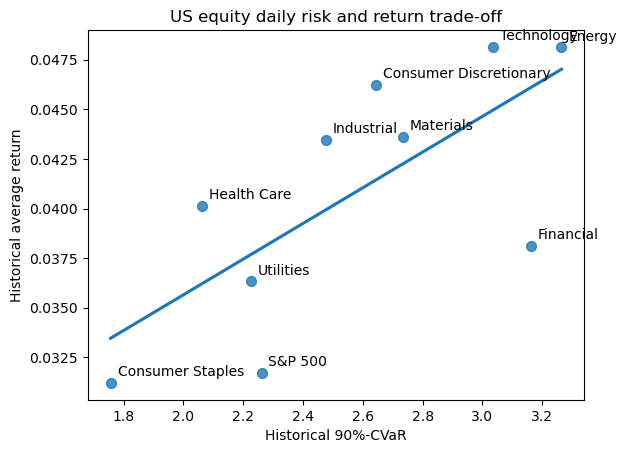

R^2: 0.5084
Intercept: 0.0177
Slope: 0.0090


In [14]:
# Scatterplot (regplot adds a regression line, scatterplot is cleaner if you only want dots)
sns.regplot(
    x=equity_stats['90%-CVaR'], 
    y=equity_stats['Mean'], 
    ci=None, 
    scatter_kws={'s':50}  # size of points
)

# Loop through rows and add labels
for i, txt in enumerate(equity_stats.index):  # assumes index has tickers/names
    plt.annotate(
        txt,
        (equity_stats['90%-CVaR'][i], equity_stats['Mean'][i]),
        textcoords="offset points",
        xytext=(5,5),   # shift label slightly so it doesn’t overlap point
        ha='left'
    )

plt.title('US equity daily risk and return trade-off')
plt.ylabel('Historical average return')
plt.xlabel('Historical 90%-CVaR')
plt.show()


# Print reg stats from the model
X = equity_stats['90%-CVaR'].values.reshape(-1, 1)
y = equity_stats['Mean'].values
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X, y)
r_sq = model.score(X, y)
print(f'R^2: {r_sq:.4f}')
print(f'Intercept: {model.intercept_:.4f}')
print(f'Slope: {model.coef_[0]:.4f}')





# Skewness and kurtosis plots

/var/folders/vp/_rbg5t1d64x0b6qgzt5hqx0m0000gn/T/ipykernel_66845/1892116737.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (equity_stats['Skewness'][i], equity_stats['Mean'][i]),


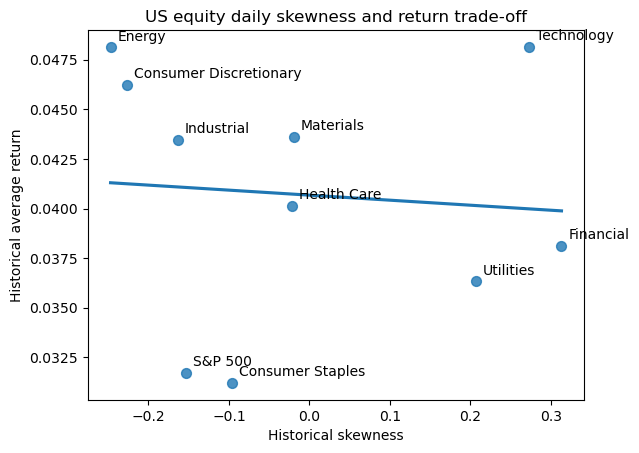

In [15]:
sns.regplot(
    x=equity_stats['Skewness'], 
    y=equity_stats['Mean'], 
    ci=None, 
    scatter_kws={'s':50}
)

for i, txt in enumerate(equity_stats.index):  # assumes index holds stock tickers/names
    plt.annotate(
        txt,
        (equity_stats['Skewness'][i], equity_stats['Mean'][i]),
        textcoords="offset points",
        xytext=(5,5),
        ha='left'
    )

plt.title('US equity daily skewness and return trade-off')
plt.ylabel('Historical average return')
plt.xlabel('Historical skewness')
plt.show()


/var/folders/vp/_rbg5t1d64x0b6qgzt5hqx0m0000gn/T/ipykernel_66845/3731350385.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (equity_stats['Kurtosis'][i], equity_stats['Mean'][i]),


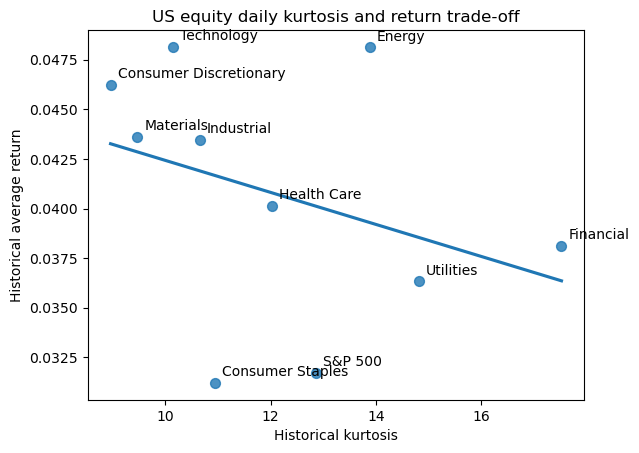

In [16]:
sns.regplot(
    x=equity_stats['Kurtosis'], 
    y=equity_stats['Mean'], 
    ci=None, 
    scatter_kws={'s':50}
)

for i, txt in enumerate(equity_stats.index):  # assumes index = ticker/name
    plt.annotate(
        txt,
        (equity_stats['Kurtosis'][i], equity_stats['Mean'][i]),
        textcoords="offset points",
        xytext=(5,5),
        ha='left'
    )

plt.title('US equity daily kurtosis and return trade-off')
plt.ylabel('Historical average return')
plt.xlabel('Historical kurtosis')
plt.show()


In [7]:
# pcrm-book - Next generation investment analysis.
# Copyright (C) 2025 Anton Vorobets.

# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the
# GNU General Public License for more details.

# You should have received a copy of the GNU General Public License
# along with this program.  If not, see <https://www.gnu.org/licenses/>.